In [10]:
import numpy
import math
import matplotlib.pyplot as plt

In [11]:
A = 3 #параметр
N = 100
B = 0.95
K = 100000 #Количество выборок с возвращением

arr = np.random.pareto(A - 1, N) + 1 #выборка

In [12]:
def est(arr):
    res = 1
    prod = 1
    for i in arr:
        prod += math.log(i)
    res = 1 + len(arr)/(prod)
    return res

A_est = est(arr)

print("Оценка параметра A: {} \n".format(est(arr)))

Оценка параметра A: 2.6886240214899706 



In [14]:
def getSubsample(arr):
    res = numpy.empty(len(arr))
    for i in range(len(arr)):
        res[i] = arr[numpy.random.randint(0, len(arr))]
    return res

arr_bootstrap = numpy.array([getSubsample(arr) for i in range(K)])

arr_estimates = numpy.array([est(arr_bootstrap[i]) for i in range(K) ])

arr_estimates = abs(A_est - arr_estimates)

arr_estimates.sort()

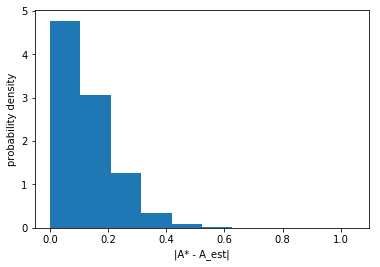

Доверительный интервал методом бутстреп: 2.377937769572621 < A < 2.9993102734073203
Dl = 0.6213725038346993


In [15]:
plt.hist(arr_estimates, density = True)
plt.xlabel('|A* - A_est|')
plt.ylabel('probability density')
plt.show()

print('Доверительный интервал методом бутстреп: {} < A < {}'.format(A_est - arr_estimates[int(K * B)], 
                                                                    A_est + arr_estimates[int(K * B)]))
print('Dl = {}'.format(2 * arr_estimates[int(K * B)]))